<h1>Esercitazione "Laboratorio di Programmazione Geometrica e Grafica"</h1>
- In questo workshop sono stati convertiti da FL a PyPlasm alcuni degli script presenti nel capitolo 1 e 2 del libro

<h2>Workshop_01 (23-10-17)</h2>

<h3>Script 1.5.3 (Table model)</h3>

```
DEF Leg = CUBOID:< 0.1,0.1,0.7 >;
DEF Plane = CUBOID:< 1, 1, 0.2>;
DEF Table = STRUCT:<
Leg, T:1:0.9, Leg, T:2:0.9, Leg, T:1:-0.9, Leg,
T:<2,3>:<-0.9,0.7>, Plane >;
DEF Table1 = STRUCT:<
Leg, T:1:0.9:Leg, T:<1,2>:<0.9,0.9>:Leg, T:2:0.9:Leg,
T:3:0.7:Plane >;
```

In [1]:
from pyplasm import *
def leg():
    return CUBOID([0.1,0.1,0.7])
def plane():
    return CUBOID([1,1,0.2])
def table():
    return STRUCT([leg(), T(1)(0.9),leg(),T(2)(0.9),leg(),T(1)(-0.9),leg(),T([2,3])([-0.9,0.7]), plane()])
def table1():
    return STRUCT([leg(),T(1)(0.9)(leg()),T([1,2])([0.9,0.9])(leg()),T(2)(0.9)(leg()),T(3)(0.7)(plane())])

Evaluating fenvs.py..
...fenvs.py imported in 0.010190617284 seconds


In [2]:
VIEW(table())

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x000000000BA83BA0> >

In [37]:
VIEW(table1())

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x000000000C07B360> >

![tavolo.PNG.png](imm/tavolo.PNG.png)
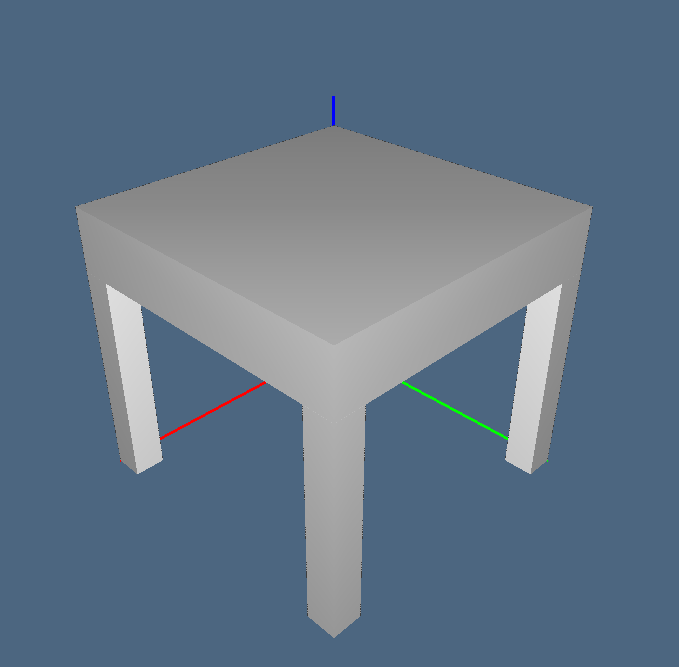

<h3>Sedia</h3>

In [59]:
from pyplasm import *

def leg():
    return CUBOID([0.1,0.1,0.7])
def plane():
    return CUBOID([1,1,0.2])
def back_of_a_chair():
    return CUBOID([0.1,1,1])
def chair():
    return STRUCT([leg(), T(1)(0.9),leg(),T(2)(0.9),leg(),T(1)(-0.9),leg(),T([2,3])([-0.9,0.7]), plane(), back_of_a_chair()])

VIEW(chair())

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x000000000BD55F90> >

![chair.png](imm/chair.png)

<h3>Script 1.5.9 (Boolean example)</h3>

```
DEF a = T:<1,2>:<-0.5,-0.5>:(CUBOID:<1,1,1>);
DEF b = R:<1,2>:(PI/4):a;
STRUCT:< a + b, T:1:2, a & b, T:1:2, a ∧ b, T:1:2, a - b >;```

In [3]:
def a():
    return T([1,2])([-0.5,-0.5])(CUBOID([1,1,1]))
def b():
    return R([1,2])(PI/4)(a())

In [9]:
VIEW(STRUCT([UNION([a(),b()]), T(1)(2), INTERSECTION([a(),b()]), T(1)(2), XOR([a(),b()]), T(1)(2),DIFFERENCE([a(),b()])]))

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x000000000B84A7E0> >

![boolean.PNG.png](imm/boolean.PNG.png)

<h3>Script 1.6.6 Virtual Manhattan (Manhattan 2D)</h3>

```
DEF Manhattan2D = MKPOL:< verts, cells, pols >
WHERE
    verts = < <0,0>,<3,0>,<5,0>,<7,0>,<8,0>,<9.5,1>,<10,1.5>,<0,3>,<3,3>,<5,3>,
    <7,3>,<8,3>,<9.5,3>,<0,4>,<3,4>,<5,4>,<9.5,4>,<12,4>,<9.5,5>,<10,5>,
    <12,5>,<0,6>,<3,6>,<5,6>,<0,7>,<3,7>,<5,7>,<9.5,7>,<12,7>,<9.5,8>,
    <12,8>,<0,9>,<3,9>,<5,9>,<8,9>,<9,9>,<12,9>,<0,10>,<3,10>,<5,10>,
    <8,10>,<9,10>,<9.5,10>,<10,10>,<12,10>,<6,11>,<7,11>,<0,12>,<3,12>,<9,12>,
    <9.5,12>,<0,13>,<3,13>,<6,13>,<7,13>,<9,13>,<9.5,13>,<0,14>,<3,14>,<5,14>,
    <8,14>,<9,14>,<9.5,14>,<10,14>,<12,14>,<0,15>,<3,15>,<5,15>,<8,15>,<0,16>,
    <6,16>,<7,16>,<9,17>,<9.5,17>,<10,17>,<12,17>,<6,18>,<7,18>,<9,18>,<9.5,18>,
    <10,18>,<12,18>,<2,19>,<3,19>,<5,19>,<8,19>,<9,19>,<9.5,19>,<10,19>,<12,19>,
    <5,20>,<12,20>,<7,22>,<10,22>,<9,6>,<12,6>,<9,15>,<9.5,15>,<10,15>,<12,15> >,
    cells = < <1,2,9,8>,<3,4,11,10>,<5,6,13,12>,<14,15,23,22>, <16,17,19,24>,
    <7,18,21,20>,<25,26,33,32>,<27,95,28,35,34>,<95,96,29,28>, <30,31,37,36>,
    <38,39,49,48>,<40,41,47,46>,<41,61,55,47>,<55,61,60,54>, <54,60,40,46>,
    <42,43,51,50>,<44,45,65,64>,<52,53,59,58>,<56,57,63,62>, <66,67,84,83,70>,
    <68,69,72,71>,<69,86,78,72>,<78,86,85,77>,<71,77,85,68>, <97,98,74,73>,
    <99,100,76,75>,<79,80,88,87>,<81,82,90,89>, <91,92,94,93> >,
    pols = AA:LIST:(1..29)
END;```

In [9]:
from larlib import *

def Manhattan2D():

    verts = [[0,0],[3,0],[5,0],[7,0],[8,0],[9.5,1],[10,1.5],[0,3],[3,3],[5,3],
    [7,3],[8,3],[9.5,3],[0,4],[3,4],[5,4],[9.5,4],[12,4],[9.5,5],[10,5],
    [12,5],[0,6],[3,6],[5,6],[0,7],[3,7],[5,7],[9.5,7],[12,7],[9.5,8],
    [12,8],[0,9],[3,9],[5,9],[8,9],[9,9],[12,9],[0,10],[3,10],[5,10],
    [8,10],[9,10],[9.5,10],[10,10],[12,10],[6,11],[7,11],[0,12],[3,12],[9,12],
    [9.5,12],[0,13],[3,13],[6,13],[7,13],[9,13],[9.5,13],[0,14],[3,14],[5,14],
    [8,14],[9,14],[9.5,14],[10,14],[12,14],[0,15],[3,15],[5,15],[8,15],[0,16],
    [6,16],[7,16],[9,17],[9.5,17],[10,17],[12,17],[6,18],[7,18],[9,18],[9.5,18],
    [10,18],[12,18],[2,19],[3,19],[5,19],[8,19],[9,19],[9.5,19],[10,19],[12,19],
    [5,20],[12,20],[7,22],[10,22],[9,6],[12,6],[9,15],[9.5,15],[10,15],[12,15]]
    
    cells = [[1,2,9,8],[3,4,11,10],[5,6,13,12],[14,15,23,22], [16,17,19,24],
    [7,18,21,20],[25,26,33,32],[27,95,28,35,34],[95,96,29,28], [30,31,37,36],
    [38,39,49,48],[40,41,47,46],[41,61,55,47],[55,61,60,54], [54,60,40,46],
    [42,43,51,50],[44,45,65,64],[52,53,59,58],[56,57,63,62], [66,67,84,83,70],
    [68,69,72,71],[69,86,78,72],[78,86,85,77],[71,77,85,68], [97,98,74,73],
    [99,100,76,75],[79,80,88,87],[81,82,90,89], [91,92,94,93]]
    
    pols = range(1, 29)
    
    return MKPOL([verts, cells, AA(LIST)(pols)])

In [10]:
VIEW(Manhattan2D())

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x000000000B022390> >

![Manhattan2D.png](imm/Manhattan2D.png)

<h3>Script 1.6.7 (Manhattan 3D)</h3>

```
DEF MultExtrude (p::IsPol) (h::IsSeqOf:IsReal) =
    STRUCT ∼ AA:* ∼ TRANS):< ThePolSeq, AA:Q:h >
WHERE
    ThePolSeq = (REVERSE ∼ AA:MKPOL ∼ AA:CAT ∼ DISTR):
    < DISTL:< MyVerts, MyCells >, <<<1>>> >,
    MyVerts = (S1 ∼ UKPOL):P,
    MyCells = (AA:LIST ∼ S2 ∼ UKPOL):P
END;
DEF GrowingH = 1..29;
DEF ManhattanH = <1,3,1,11,1,0.2,1,0.1,1,8,15,1,1,1,1,8,1,15,8,1,2,2,2,2,5,9,1,1,1>;```


In [15]:
from larlib import *

def MultExtrude(p, h):
    MyVerts = COMP([S1, UKPOL])(p)
    MyCells = COMP([AA(LIST), S2, UKPOL])(p)
    ThePolSeq = COMP([REVERSE, AA(MKPOL), AA(CAT), DISTR])([DISTL([MyVerts, MyCells]),[[[1]]]])
    
    return COMP([STRUCT, AA(PROD), TRANS])([ThePolSeq, AA(Q)(h)])

def GrowingH():
    return range(1, 29)

def Manhattan():
    return [1,3,1,11,1,0.2,1,0.1,1,8,15,1,1,1,1,8,1,15,8,1,2,2,2,2,5,9,1,1,1]

a = (MultExtrude(Manhattan2D(), GrowingH()))
b = (MultExtrude(Manhattan2D(), Manhattan()))

VIEW(a)
VIEW(b)

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x0000000007E46390> >

![Manhattan1.png](imm/Manhattan1.png)

![Manhattan2.png](imm/Manhattan2.png)

![Manhattan3.png](imm/Manhattan3.png)

![Manhattan4.png](imm/Manhattan4.png)